# Challenge 5  - Data Cleaning, Transformations and ETL pipeline architecture

##### The first crucial step of providing accurate and reliable data input for further processing is data cleaning (Pre-processing). The below code shows step-by-step flow from analyzing the data generally till specifying each column for thorough cleaning. 

### Step 1 - Importing necessary library

In [20]:
import pandas as pd 
import numpy as np
import missingno as msno
import re

### Step 2 - Data reading for dataframe conversion

In [21]:
loyalty = "Challenge_5\test_dataset\loyalty.csv"
loyalty_df = pd.read_csv(loyalty,index_col=False,keep_default_na=True)
transaction = 'Challenge_5\test_dataset\transactions.csv'
transaction_df = pd.read_csv(transaction,index_col=False,keep_default_na=True)

### Step 3 - Displaying first 4 data of each dataframe

##### From rough observation, it can observed that in loyalty_df dataframe created from the loyalty dataset shows incosistent and dirty data especially in the name, city, phone-number and email compared to transaction dataset.

In [22]:
loyalty_df.head()

,name,city,phone-number,license-plate,email,id
0,Gary Cannon,Pric#%edale,339-486-5500,BOB-0788,Gar#%y_C@verizon.com,d37a5246-6ca3-4ade-9472-d7671becc853
1,Brian Montes,Rosebud,336-853-9842,AXI-4190,Brian.M@outlook.com,65ad4511-b6fd-4cf7-8520-7f3d68776e5e
2,Christopher[ Todd Jr.,Llano.,1 59#%-161-0094,LRM-754,Christopher_Jr.@mail.com,45c97ee7-a932-459e-b0de-dd8160b3efe3
3,Lynn Blake,Greenbank,174-4]98-313]0,MRW -4495,Blake_Lynn45@zoho. com,15abb55d-ec36-4b88-bba2-a58af8accd81
4,Jennifer Allen,S.N.P.J.,/240-375121-3895,HBI-2202,Je nnifer.Allen@yahoo.com,4b166f8d-ecab-43c5-ae0f-a09beb3ea4c0


In [23]:
transaction_df.head()

,name,city,phone-number,email,id,TransactionID,Amount
0,Gary Cannon,Pricedale,339-486-5500,Gary_C@verizon.com,d37a5246-6ca3-4ade-9472-d7671becc853,0,1372
1,Brian Montes,Rosebud,336-853-9842,Brian.M@outlook.com,65ad4511-b6fd-4cf7-8520-7f3d68776e5e,1,1779
2,Christopher Todd Jr.,Llano,159-161-0094,Christopher_Jr.@mail.com,45c97ee7-a932-459e-b0de-dd8160b3efe3,2,11
3,Lynn Blake,Greenbank,174-498-3130,Blake_Lynn45@zoho.com,15abb55d-ec36-4b88-bba2-a58af8accd81,3,101
4,Jennifer Allen,S.N.P.J.,240-375-3895,Jennifer.Allen@yahoo.com,4b166f8d-ecab-43c5-ae0f-a09beb3ea4c0,4,1318


### Step 4 - Analyzing and Finding similarity and differences between each dataset.  

#### By finding the similar column in each dataset helps in joining the two dataset together. It can be observed that column Id which is present in both dataset contained similar data hence can be used as common column to be merged on.

In [24]:
loyalty_col = loyalty_df.columns
transaction_col = transaction_df.columns
same_column = loyalty_col.intersection(transaction_col)
diff_column = np.concatenate((loyalty_col.difference(transaction_col), transaction_col.difference(loyalty_col)), axis=0)
print('Column ' + ', '.join(list(same_column)) + ' can be found in both dataset')
print('Column ' + ', '.join(list(diff_column)) + ' are/is the different column')

for i in same_column:
    if transaction_df[i].equals(loyalty_df[i]) is True:
        print('Values in column ' + i + ' for both dataset are the same')

Column name, city, phone-number, email, id can be found in both dataset
Column license-plate, Amount, TransactionID are/is the different column
Values in column id for both dataset are the same


### Step 5 - Filtering each dataset for any dirty values and keeping appropriate column for merging plus observing null values for each column

The dataset is not clean


<AxesSubplot:>

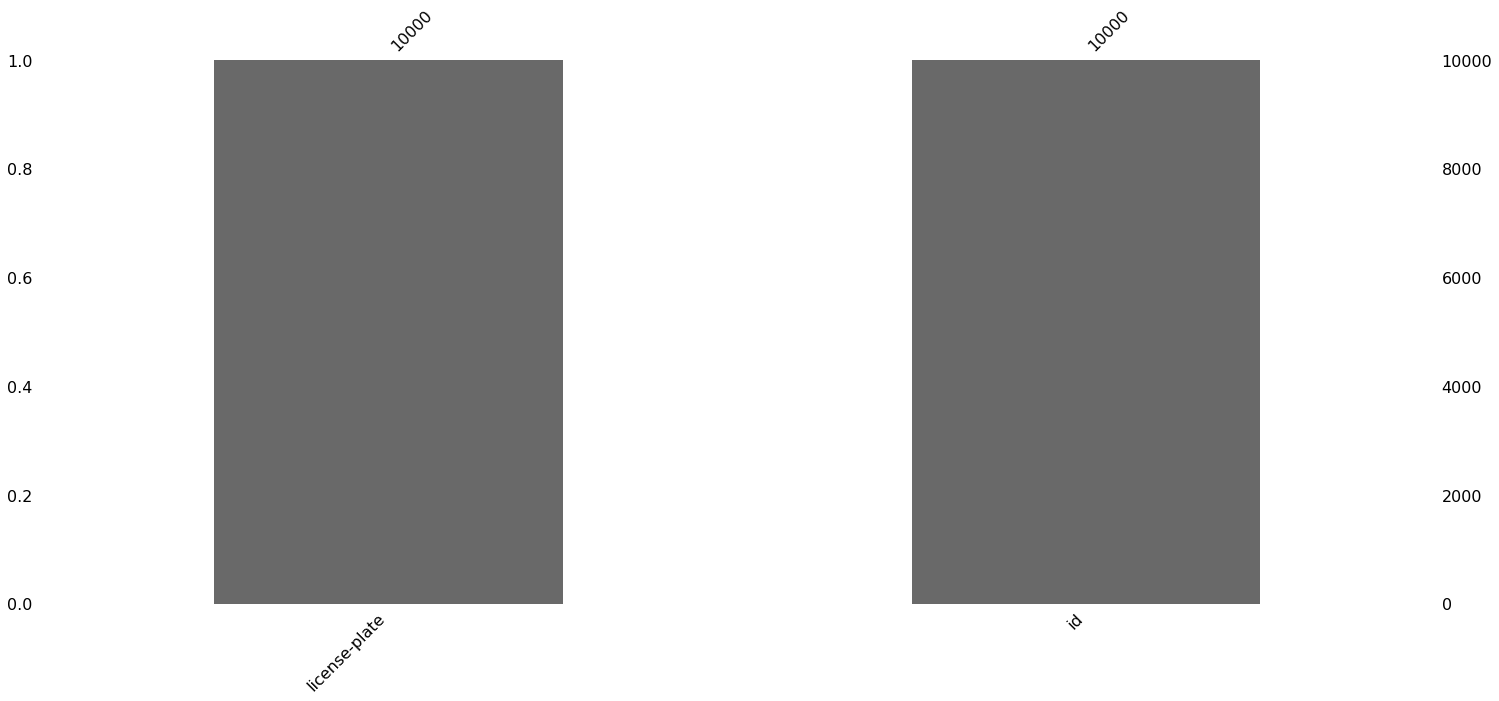

In [25]:
if len(loyalty_df[loyalty_df['email'].str.contains(".com$|.net$", na=False)]) == 10000:
    if len(loyalty_df[loyalty_df['name'].str.contains('.*[0-9].*', na=False)]) == 0:
        if len(loyalty_df[loyalty_df['phone-number'].str.contains('[@_!#$%^&*()<>?/\|}{~:]', na=False)]) == 0:
            if len(loyalty_df[loyalty_df['city'].str.contains('.*[0-9].*', na=False)]) == 0:
                print('The dataset is clean')
else:
    print('The dataset is not clean')
    loyalty_df = loyalty_df.drop(['name', 'city', 'phone-number', 'email'], axis = 1)
    
msno.bar(loyalty_df)

The dataset is clean


<AxesSubplot:>

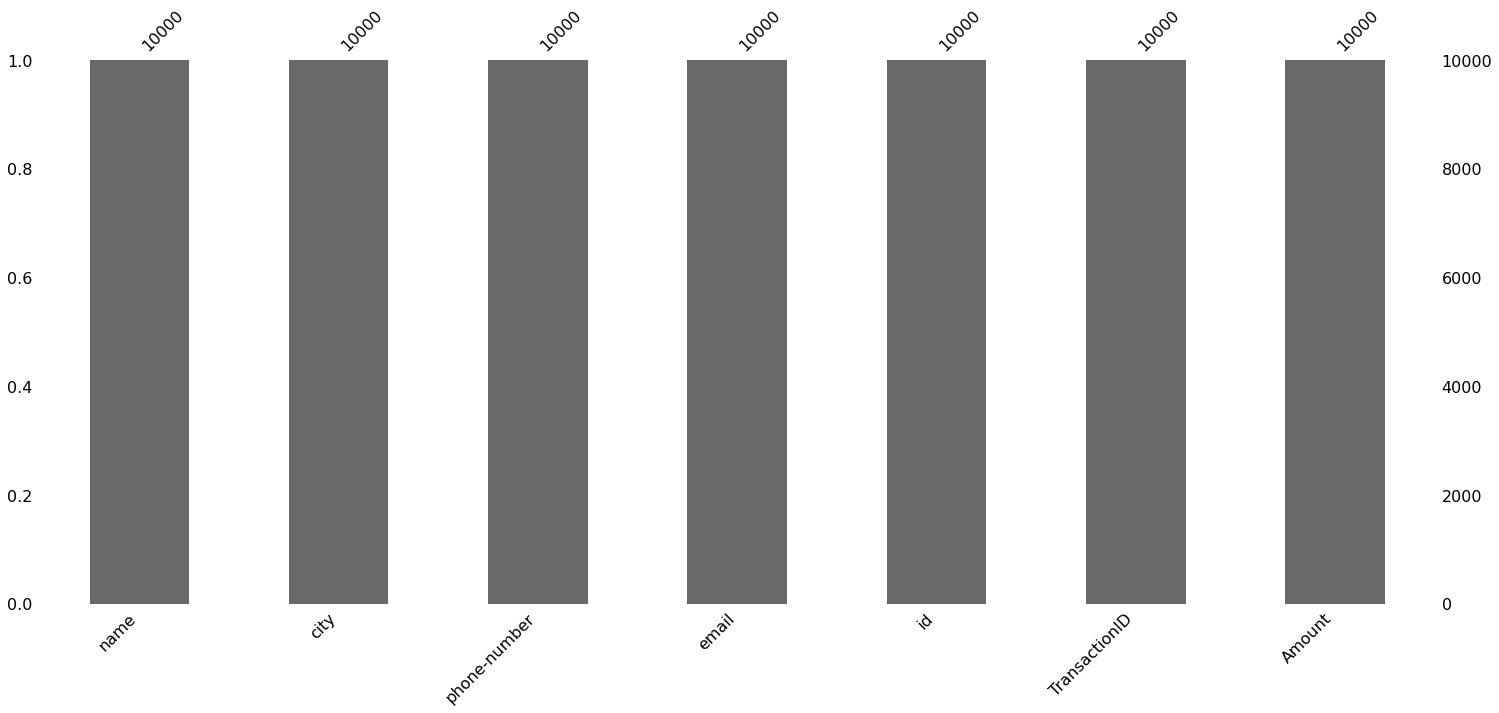

In [26]:
if len(transaction_df[transaction_df['email'].str.contains(".com$|.net$", na=False)]) == 10000:
    if len(transaction_df[transaction_df['name'].str.contains('.*[0-9].*', na=False)]) == 0:
        if len(transaction_df[transaction_df['phone-number'].str.contains('[@_!#$%^&*()<>?/\|}{~:]', na=False)]) == 0:
            if len(transaction_df[transaction_df['city'].str.contains('.*[0-9].*', na=False)]) == 0:
                print('The dataset is clean')
else:
    print('The dataset is not clean')
    transaction_df = transaction_df.drop(['name', 'city', 'phone-number', 'email'], axis = 1)
msno.bar(transaction_df)

### Step 6 - Merging two dataset

In [27]:
combine_df = pd.merge(transaction_df, loyalty_df, on="id")
# combine_df

### Bonus - Maintained dirty data

##### In the license-plate column, there are several data which have inconsistent plate number with special characters. Nonetheless, the data is kept depending on the use cases.

In [28]:
print(combine_df[combine_df['license-plate'].str.contains('[@_!#$%^&*()<>?/\|}{~:]', na=False)])

                     name             city  phone-number  \
6        Michelle Mullins  Preston Heights  259-622-8878   
24         Chad Alexander          Fowlkes  798-236-8560   
40    Jacqueline Mitchell            Corry  529-098-1056   
46         Richard Garcia             Mott  380-438-6288   
50           Sheila Jones          Parnell  674-201-5332   
...                   ...              ...           ...   
9958   Catherine Gonzalez          Dillard  942-990-6651   
9967          James Henry           Gaskin  618-975-5096   
9970           Gina Scott      North Eaton  855-355-1865   
9973          Kevin Smith      South Range  976-029-6246   
9985        Ross Franklin      South Salem  812-786-5255   

                                 email                                    id  \
6      Mullins_Michelle@protonmail.com  d556f557-06ea-4c6f-a712-4212eec6fca4   
24                Chad.A98@hotmail.com  b57f9a65-893e-4a34-865c-c48f3d57d370   
40    Mitchell.Jacqueline47@yandex.com 

In [29]:
# combine_df.to_excel('loyalty_transaction.xlsx',sheet_name='Unit 1',startrow=0 , startcol=0)